# **AVALIAÇÃO 01: INVESTIGAÇÃO OPERACIONAL**
##  Exercícios de programação linear

<font face="CMU Serif" size="4px"><i>Gabriel Przytocki; Pedro Contessoto; Valdemar Ceccon</i></font> <br>
Abril, 2022

In [ ]:
# download de pacotes necessários para o LaTeX
!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!sudo apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
!sudo apt install texlive-fonts-recommended texlive-fonts-extra lmr-super dvipng
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended

In [ ]:
# importação das bibliotecas necessárias
!pip install pulp --quiet
from pulp import *

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# configurações do matplotlib para exibir gráficos com LaTeX
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 14

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

## **PROBLEMA 01**

<font face="CMU Serif" size="4px">
Um fabricante produz bicicletas e motoretas, devendo cada uma delas ser processada em duas oficinas. A oficina $1$ tem um máximo de 120 hora de trabalho disponível e a oficina $2$ um máximo de 180 h. O fabrico de uma bicicleta requer 6 hora de trabalho na oficina $1$ e 3 h na oficina $2$. O fabrico de uma motoreta requer 4 h na oficina $1$ e 1 hora na oficina $2$. O lucro é de 30 € por bicicleta e de 40 € por motoreta. Formule o problema da determinação do plano de produção como sendo de programação linear, de modo a maximizar o lucro.
</font>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de bicicletas <br>
$x_2$: Quantidade de motoretas <br>

**Função objetivo** <br>
$$ \max \ 30x_1 + 40x_2 $$ <br>

**Restrições** <br>
$ 6x_1 + 4x_2 \leq 120 $ <br>
$ 3x_1 + 1x_2 \leq 180 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_1_bicicletas_e_motoretas', LpMaximize)

# variáveis
x1 = LpVariable('n_bicicletas', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_motoretas', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 30*x1 + 40*x2

# restrições
prob += 6*x1 + 4*x2 <= 120
prob += 3*x1 + 1*x2 <= 180

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (€) =', value(prob.objective))

n_bicicletas = 0.0
n_motoretas = 30.0

Lucro máximo (€) = 1200.0


### Gráfico com região factível

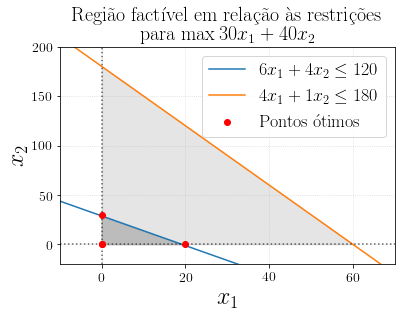

In [ ]:
x = np.linspace(-20, 70, 1000)

# 6*x1 + 4*x2 <= 120
y1 = (6*x - 120+5)/-4

# 3*x1 + 1*x2 <= 180
y2 = (3*x - 180)/-1

plt.plot(x, y1, label=r'$6x_1 + 4x_2 \leq 120$')
plt.plot(x, y2, label=r'$4x_1 + 1x_2 \leq 180$')

plt.axvline(linestyle=':', color='black', alpha=.6)
plt.axhline(linestyle=':', color='black', alpha=.6)

plt.scatter([20,0],[0,30], zorder=5, color='r', label='Pontos ótimos')
plt.scatter([0,0],[0,0], zorder=5, color='r')

plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)

plt.xlim(-10,70)
plt.ylim(-20,180+20)


plt.fill_between(x, y2, where=((y2>0)&(y2<180)), color='grey', alpha=0.2)
plt.fill_between(x, y1, where=((y1>0)&(y1<30-1)), color='grey', alpha=0.4)

plt.legend(fontsize=18);

plt.grid(linestyle=':', alpha=.5)
plt.title('Região factível em relação às restrições\n' \
          + 'para $\max 30x_1 + 40x_2$', fontsize=20);

---
## **PROBLEMA 02**
<p>
<font face="CMU Serif" size="4px">
Uma empresa metalomecânica decidiu abandonar a produção de alguns produtos não
lucrativos da sua gama de fabrico. Esta decisão conduz à existência de excesso de capacidade de produção em algumas secções da fábrica, que a administração pensa utilizar para produzir três novos produtos ($P_1$, $P_2$, e $P_3$) mais rentáveis.
A capacidade disponível em cada uma das três secções que podem limitar a produção destes produtos é dada na tabela seguinte:
</font>
</p>

| Disponibilidade | Secção Horas/semana |
|-----------------|---------------------|
| **Frezadoras**      | 500                 |
| **Tornos**          | 350                 |
| **Furadoras**       | 150                 |

<br>
<font face="CMU Serif" size="4px">
O número de horas necessárias, em cada secção, para produzir uma unidade de cada um dos produtos apresenta-se na seguinte tabela:
</font>

| Disponibilidade | $P_1$ | $P_2$ | $P_3$ |
|-----------------|------|------|------|
| **Frezadoras**      | $9$  | $3$  | $5$  |
| **Tornos**          | $5$  | $4$  | $0$  |
| **Furadoras**       | $3$  | $0$  | $2$  |

<br>
<p>
<font face="CMU Serif" size="4px">
O departamento de vendas prevê que a procura dos produtos $P_1$ e $P_3$ excede a capacidade de produção destes produtos e que a procura semanal do produto $P_2$ é de 20 unidades. O lucro unitário é de 33 $u.m.$, 12 $u.m.$ e 19 $u.m.$, respectivamente, para os produtos $P_1$, $P_2$ e $P_3$.
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
Formule este problema, como um problema de programação linear de modo a 
determinar qual o número de unidades a fabricar semanalmente de cada um dos 
produtos, por forma a maximizar o lucro.
</font>
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de produtos $P_1$ <br>
$x_2$: Quantidade de produtos $P_2$ <br>
$x_2$: Quantidade de produtos $P_3$ <br>

**Função objetivo** <br>
$$ \max \ 33x_1 + 12x_2 + 19x_3 $$ <br>

**Restrições** <br>
$ 9x_1 + 3x_2 + 5x_3 \leq 500 $ <br>
$ 5x_1 + 4x_2 + 0x_3 \leq 350 $ <br>
$ 3x_1 + 0x_2 + 2x_3 \leq 150 $ <br>
$ x_2 \leq 20 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_2_empresa_metalomecanica', LpMaximize)

# variáveis
x1 = LpVariable('n_produto_p1', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_produto_p2', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_produto_p3', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 33*x1 + 12*x2 + 19*x3

# restrições
prob += 9*x1 + 3*x2 + 5*x3 <= 500
prob += 5*x1 + 4*x2 + 0*x3 <= 350
prob += 3*x1 + 0*x2 + 2*x3 <= 150
prob += x2 <= 20

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (u.m) =', value(prob.objective))

n_produto_p1 = 45.0
n_produto_p2 = 20.0
n_produto_p3 = 7.0

Lucro máximo (u.m) = 1858.0


---
## **PROBLEMA 03**

<font face="CMU Serif" size="4px">
Uma fábrica produz dois produtos $P_1$ e $P_2$. A produção unitária de cada produto 
necessita de uma certa quantidade de horas de fabricação sobre cinco máquinas 
diferentes ($A$, $B$, $C$, $D$ e $E$), como se pode verificar no quadro seguinte:
</font>
<br><br>

<table>
  <tr>
    <td></td>
    <td><b>Máquina</b></td>
    <td>$A$</b></td>
    <td><b>$B$</b></td>
    <td><b>$C$</b></td>
    <td><b>$D$</b></td>
    <td><b>$E$</b></td>
  </tr>
  </tr>
  <tr>
    <td><b>Produto</b></td>
    <td></td>
  </tr>
  <tr>
    <td>$P_1$</td>
    <td></td>
    <td>0</td>
    <td>1.5</td>
    <td>2</td>
    <td>3</td>
    <td>3</td>
  </tr>
  <tr>
    <td>$P_2$</td>
    <td></td>
    <td>3</td>
    <td>4</td>
    <td>3</td>
    <td>2</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Disp. de cada máquina</td>
    <td></td>
    <td>39h</td>
    <td>60h</td>
    <td>57h</td>
    <td>70h</td>
    <td>57h</td>
  </tr>
</table>

<br>
<p>
<font face="CMU Serif" size="4px">
As margens brutas unitárias de cada produto são: 6 € para o produto 1 e 15 € para o produto 2.
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
Formular o programa linear que permite a determinação do plano de produção óptimo desta fábrica.
</font>
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de produtos $P_1$ <br>
$x_2$: Quantidade de produtos $P_2$ <br>

**Função objetivo** <br>
$$ \max \ 6x_1 + 15x_2 $$ <br>

**Restrições** <br>
$ 0x_1 + 3x_2 \leq 39 $ <br>
$ 1.5x_1 + 4x_2 \leq 60 $ <br>
$ 2x_1 + 3x_2 \leq 57 $ <br>
$ 3x_1 + 2x_2 \leq 70 $ <br>
$ 3x_1 + 0x_2 \leq 57 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_3_produtos_p1_e_p2', LpMaximize)

# variáveis
x1 = LpVariable('produto_p1', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('produto_p2', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 6*x1 + 15*x2

# restrições
prob += 0*x1 + 3*x2 <= 39
prob += 1.5*x1 + 4*x2 <= 60
prob += 2*x1 + 3*x2 <= 57
prob += 3*x1 + 2*x2 <= 70
prob += 3*x1 + 0*x2 <= 57

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (€) =', value(prob.objective))

produto_p1 = 13.0
produto_p2 = 10.0

Lucro máximo (€) = 228.0


---
## **PROBLEMA 04**

<font face="CMU Serif" size="4px">
Uma empresa de empacotamento (produção) de carnes pode produzir diariamente até 
480 presuntos, 400 salpicões e 230 lombos. Cada um destes produtos pode ser vendido 
fresco ou defumado. O total de presuntos, salpicões e lombos que podem ser defumados 
num dia de trabalho normal é de 420 unidades; todavia podem ainda ser defumados em 
horário extraordinário até um total de 250 unidades daqueles produtos. Os lucros 
líquidos unitários de vendas são os seguintes (em escudos).
</font>
<br><br>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Defumado em horário</th>
    </tr>
    <tr>
      <th></th>
      <th>Fresco</th>
      <th>Normal</th>
      <th>Extraordinário</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Presunto</th>
      <td>800</td>
      <td>1400</td>
      <td>1100</td>
    </tr>
    <tr>
      <th>Salpicão</th>
      <td>400</td>
      <td>1200</td>
      <td>700</td>
    </tr>
    <tr>
      <th>Lombo</th>
      <td>400</td>
      <td>1300</td>
      <td>900</td>
    </tr>
  </tbody>
</table>

<br>
<p>
<font face="CMU Serif" size="4px">
O objectivo é planear um esquema de produção (empacotamento) que maximize o lucro 
diário total, ou seja, saber quantos presuntos frescos e quantos defumados, quantos 
salpicões frescos e quantos defumados, quantos lombos frescos e quantos defumados se 
devem produzir diariamente por forma a maximizar a lucro total.
</font> 
</p>

<p>
<font face="CMU Serif" size="4px">
Formule este problema de acordo com um modelo de programação linear.
</font>
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de presuntos frescos <br>
$x_2$: Quantidade de presuntos defumados em horário normal <br>
$x_3$: Quantidade de presuntos defumados em horário extraordinário <br>
$x_4$: Quantidade de salpicões frescos <br>
$x_5$: Quantidade de salpicões defumados em horário normal <br>
$x_6$: Quantidade de salpicões defumados em horário extraordinário <br>
$x_7$: Quantidade de lombos frescos <br>
$x_8$: Quantidade de lombos defumados em horário normal <br>
$x_9$: Quantidade de lombos defumados em horário extraordinário <br>

**Função objetivo** <br>
$$ \max \ 800x_1 + 1400x_2 + 1100x_3 $$ $$ \ \ \ \ \ \ \ \ \ + 400x_4 + 1200x_5 + 700x_6 $$ $$ \ \ \ \ \ \ \ \ \ + 400x_7 + 1300x_8 + 900x_9 $$

**Restrições de quantidade** <br>
$ x_1 + x_2 + x_3 \leq 480 $ <br>
$ x_4 + x_5 + x_6 \leq 400 $ <br>
$ x_7 + x_8 + x_9 \leq 230 $ <br>

**Restrições de defumação** <br>
$ x_2 + x_5 + x_8 \leq 420 $ <br>
$ x_3 + x_6 + x_9 \leq 250 $ <br>


In [ ]:
# resolução do problema
prob = LpProblem('problema_4_empresa_de_carnes', LpMaximize)

# variáveis
x1 = LpVariable('n_presunto_fresco', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_presunto_defumado_normal', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_presunto_defumado_extra', lowBound=0, cat=const.LpInteger)
x4 = LpVariable('n_salpicao_fresco', lowBound=0, cat=const.LpInteger)
x5 = LpVariable('n_salpicao_defumado_normal', lowBound=0, cat=const.LpInteger)
x6 = LpVariable('n_salpicao_defumado_extra', lowBound=0, cat=const.LpInteger)
x7 = LpVariable('n_lombo_fresco', lowBound=0, cat=const.LpInteger)
x8 = LpVariable('n_lombo_defumado_normal', lowBound=0, cat=const.LpInteger)
x9 = LpVariable('n_lombo_defumado_extra', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 800*x1 + 1400*x2 + 1100*x3 + \
        400*x4 + 1200*x5 + 700*x6 + \
        400*x7 + 1300*x8 + 900*x9

# restrições de quantidade
prob += x1 + x2 + x3 <= 480
prob += x4 + x5 + x6 <= 400
prob += x7 + x8 + x9 <= 230

# restrições de dufamação
prob += x2 + x5 + x8 <= 420
prob += x3 + x6 + x9 <= 250

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (escudos) =', value(prob.objective))

n_lombo_defumado_extra = 210.0
n_lombo_defumado_normal = 20.0
n_lombo_fresco = 0.0
n_presunto_defumado_extra = 40.0
n_presunto_defumado_normal = 0.0
n_presunto_fresco = 440.0
n_salpicao_defumado_extra = 0.0
n_salpicao_defumado_normal = 400.0
n_salpicao_fresco = 0.0

Lucro máximo (escudos) = 1091000.0


---
## **PROBLEMA 05**

<p>
<font face="CMU Serif" size="4px">
Suponha que uma dona de casa pretende servir à família um menu semanal em que 
entrem seis vegetais, tentando minimizar o custo, mas fornecendo o número de 
componentes necessários a uma alimentação equilibrada. Na tabela seguinte resumem-se os factores envolvidos.
</font>
<p>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="5" halign="left">Unidades/porção (mg)</th>
      <th></th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>Ferro</th>
      <th>Fósforo</th>
      <th>Vit. A</th>
      <th>Vit. B</th>
      <th>Vit. C</th>
      <th><strong>Custo/porção ($)</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="6" valign="top">Vegetal</th>
      <th>Feijão verde</th>
      <td>0.45</td>
      <td>10</td>
      <td>415</td>
      <td>8</td>
      <td>0.3</td>
      <td>50</td>
    </tr>
    <tr>
      <th>Cenouras</th>
      <td>0.45</td>
      <td>28</td>
      <td>9065</td>
      <td>3</td>
      <td>0.35</td>
      <td>50</td>
    </tr>
    <tr>
      <th>Brócolos</th>
      <td>1.05</td>
      <td>50</td>
      <td>2550</td>
      <td>53</td>
      <td>0.6</td>
      <td>80</td>
    </tr>
    <tr>
      <th>Couves</th>
      <td>0.4</td>
      <td>25</td>
      <td>75</td>
      <td>27</td>
      <td>0.15</td>
      <td>20</td>
    </tr>
    <tr>
      <th>Nabos</th>
      <td>0.5</td>
      <td>22</td>
      <td>15</td>
      <td>5</td>
      <td>0.25</td>
      <td>60</td>
    </tr>
    <tr>
      <th>Batatas</th>
      <td>0.5</td>
      <td>75</td>
      <td>235</td>
      <td>8</td>
      <td>0.8</td>
      <td>30</td>
    </tr>
    <tr>
      <th>Necessidades semanais mínimas</th>
      <th></th>
      <td>6</td>
      <td>325</td>
      <td>17500</td>
      <td>245</td>
      <td>5</td>
      <td></td>
    </tr>
  </tbody>
</table>

<br>
<p>
<font face="CMU Serif" size="4px">
Sabe-se ainda que não podem ser servidas mais do que duas porções de couve e mais do que quatro porções dos outros vegetais por semana. 
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
Formule o problema em termos de programação linear de modo a determinar o número 
de vezes que cada vegetal deve ser servido durante a próxima semana de forma a 
minimizar os custos e suprir as necessidades alimentares.
</font>
</p>

### Descrição da solução
A modelagem abaixo foi realizada utilizando frações no lugar de números decimais, de maneira a manter a mesma mais limpa e precisa.

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Unidades de feijão verde <br>
$x_2$: Unidades de cenouras <br>
$x_3$: Unidades de brócolos <br>
$x_4$: Unidades de couves <br>
$x_5$: Unidades de nabos <br>
$x_6$: Unidades de batatas <br>

**Função objetivo** <br>
$$ \min \ 50x_1 + 50x_2 + 80x_3 + 20x_4 + 60x_5 + 30x_6 $$ <br>

**Restrições de necessidades mínimas dos componentes** <br>

$$ \left(\frac{45}{100}\right)x_1 + \left(\frac{45}{100}\right)x_2 +\left(\frac{105}{10000}\right)x_3 + \left(\frac{4}{10}\right)x_4 + \left(\frac{5}{10}\right)x_5 + \left(\frac{5}{10}\right)x_6 \geq 6 $$

$$ 10x_1 + 28x_2 + 50x_3 + 25x_4 + 22x_5 + 75x_6 \geq 325 $$

$$ 415x_1 + 9065x_2 + 2550x_3 + 75x_4 + 15x_5 + 235x_6 \geq 17500 $$

$$ 8x_1 +3x_2 + 53x_3 + 27x_4 + 5x_5 + 8x_6 \geq 245 $$

$$ \left(\frac{3}{10}\right)x_1 + \left(\frac{35}{100}\right)x_2 + \left(\frac{6}{10}\right)x_3 + \left(\frac{15}{100}\right)x_4 + \left(\frac{25}{100}\right)x_5 + \left(\frac{8}{10}\right)x_6 \geq 65 $$ <br>

**Restrições de quantidade máxima de poções** <br>
$$ x_4 \leq 2 $$
$$ x_1 \leq 4 $$
$$ x_2 \leq 4 $$
$$ x_3 \leq 4 $$
$$ x_5 \leq 4 $$
$$ x_6 \leq 4 $$

In [ ]:
# resolução do problema
prob = LpProblem('problema_5_vegetais', LpMinimize)

# variáveis
x1 = LpVariable('n_feijao verde', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_cenouras', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_brocolos', lowBound=0, cat=const.LpInteger)
x4 = LpVariable('n_couves', lowBound=0, cat=const.LpInteger)
x5 = LpVariable('n_nabos', lowBound=0, cat=const.LpInteger)
x6 = LpVariable('n_batatas', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 50*x1 + 50*x2 + 80*x3 + 20*x4 + 60*x5 + 30*x6

# restrições de necessidades mínimas dos componentes
prob += x1*.45 + x2*.45 + x3*1.05 + x4*.4 + x5*.5 + x6*.5 >= 6
prob += x1*10 + x2*28 + x3*50 + x4*25 + x5*22 + x6*75 >= 325
prob += x1*415 + x2*9065 + x3*2550 + x4*75 + x5*15 + x6*235 >= 17500
prob += x1*8 + x2*3 + x3*53 + x4*27 + x5*5 + x6*8 >= 245
prob += x1*.3 + x2*.35 + x3*.6 + x4*.15 + x5*.25 + x6*.8 >= 5

# restrições de quantidade máxima de poções
prob += x4 <= 2
prob += x1 <= 4
prob += x2 <= 4
prob += x3 <= 4
prob += x5 <= 4
prob += x6 <= 4

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nDinheiro minimo gasto =', value(prob.objective))

n_batatas = 4.0
n_brocolos = 3.0
n_cenouras = 1.0
n_couves = 2.0
n_feijao_verde = 0.0
n_nabos = 0.0

Dinheiro minimo gasto = 450.0


---
## **PROBLEMA 06**

<font face="CMU Serif" size="4px">
Pretende-se determinar a composição de uma ração para o gado. O alimento é obtido a 
partir de uma mistura de três produtos brutos: cevada, amendoim e sésamo. Para 
responder a certas exigências da clientela, o alimento deverá conter pelo menos 22% de 
proteínas e 3.6% de matéria gorda. No quadro abaixo, indicamos as quantidades de 
proteínas e de gorduras presentes respectivamente na cevada, no amendoim e no 
sésamo, bem como o custo, por tonelada, de cada um destes três produtos brutos.
</font>
<br><br>

| Produto bruto      |   Cevada |   Amendoim |   Sésamo |
|:-------------------|---------:|-----------:|---------:|
| % de proteínas     |       22 |         52 |       42 |
| % de gorduras      |        1 |          2 |       10 |
| Custo por tonelada |       25 |         41 |       39 |

<br>
<font face="CMU Serif" size="4px">
Formular, sem resolver, o programa linear que permite a determinação da composição 
do alimento por forma a minimizar o custo de produção.
</font>

### Descrição da solução
Essa questão, ao nosso entendimento, carece de uma informação que possibilitaria fornecer um número preciso acerca da quantidade de cada produto: a quantidade total de ração que se deseja fazer. Contudo, apesar desta informação não ser disposta no enunciado, para diferentes quantidades totais de ração que se deseja produzir, mantemos a mesma proporção entre cevada e sésamo e amendoim. Nesse sentido, não existe uma resposta objetiva (em gramas) de cada quantidade de produto a ser utilizada, porém existe o percentual de cada produto em relação à quantidade total que se deseja; essas quantidades são, respectivamente, $71,1\%$ de cevada, $28,9\%$ de sésamo e $0\%$ de amendoim. Com esses percentuais, produz-se a ração a um custo mínimo, atendendo aos critérios estabelecidos no enunciado.

Na modelagem realizada abaixo, está contida a restrição $ x_1 + x_2 + x_3 = T $, sendo a informação adicional a respeito da quantidade total de toneladas da ração que se deseja produzir, que não está contemplada no enunciado. Esta restriçã afirma que a soma das quantidade de cada ração devem ser iguais à quantidade que se deseja produzir, designada como sendo uma variável $T$.

Na solução apresentada no `Python`, utilizamos diferentes valores para $T$, respectivamente $100g$, $1T$, $2T$, $3T$, $4T$ e $5T$. Portanto, foram apresentadas diferentes quantidades de cada produto, para cada solução em cada caso. Como mencionado, observamos que as proporções dos produtos se mantiveram para os diferentes valores de $T$. As respectivas quantidades de cada produto, bem como o custo total associado, juntamente com a proporção dos componentes em relação ao peso total, estão exibidos abaixo da modelagem.

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Toneladas de cevada <br>
$x_2$: Toneladas de amendoim <br>
$x_3$: Toneladas de sésamo

**Função objetivo** <br>
$$ \min \ 25x_1 + 41x_2 + 39x_3 $$ <br>

**Restrições de quantidade** <br>
$$ \left(\frac{22}{100}\right)x_1 + \left(\frac{52}{100}\right)x_2 + \left(\frac{42}{100}\right)x_3 \geq \left(\frac{22}{100}\right)(x_1 + x_2 + x_3) $$

$$ \left(\frac{1}{100}\right)x_1 + \left(\frac{2}{100}\right)x_2 + \left(\frac{10}{100}\right)x_3 \geq \left(\frac{36}{1000}\right)(x_1 + x_2 + x_3) $$

$$ x_1 + x_2 + x_3 = T $$ <br>


In [ ]:
def problema_6_racao_para_gado(toneladas_racao):
    # resolução do problema
    prob = LpProblem('problema_6_ração_para_gado', LpMinimize)

    print('Quantidade de ração (T) =', toneladas_racao)
    
    # cat=const.LpInteger
    # variáveis
    x1 = LpVariable('toneladas_cevada', lowBound=0)
    x2 = LpVariable('toneladas_amendoim', lowBound=0)
    x3 = LpVariable('toneladas_sesamo', lowBound=0)

    # função objetivo
    prob += 25*x1 + 41*x2 + 39*x3

    # restrições acerca da composição mínima da ração
    prob += .22*x1 + .52*x2 + .42*x3 >= .22*(x1 + x2 + x3)
    prob += .01*x1 + .02*x2 + .1*x3 >= .036*(x1 + x2 + x3)

    # restrição acerca da quantidade mínima de ração necessária
    prob += 1*x1 + 1*x2 + 1*x3 == toneladas_racao

    prob.solve()

    for v in prob.variables():
        print(v.name, '=', v.varValue)

    print(f'\nRazão entre {x1.name} e {x3.name} =', round(x1.varValue/x3.varValue, 3))
    print(f'Percentual de {x1.name} =', round((x1.varValue/toneladas_racao), 3))
    print(f'Percentual de {x3.name} =', round((x3.varValue/toneladas_racao), 3))
    print('\nCusto total mínimo =', value(prob.objective))
    print('-'*40, '\n')

# diferentes quantidades de ração a serem testadas
toneladas_racao = [.1, 1, 2, 3, 4, 5]

for i in toneladas_racao:
    problema_6_racao_para_gado(toneladas_racao=i)

Quantidade de ração (T) = 0.1
toneladas_amendoim = 0.0
toneladas_cevada = 0.071111111
toneladas_sesamo = 0.028888889

Razão entre toneladas_cevada e toneladas_sesamo = 2.462
Percentual de toneladas_cevada = 0.711
Percentual de toneladas_sesamo = 0.289

Custo total mínimo = 2.9044444460000003
---------------------------------------- 

Quantidade de ração (T) = 1
toneladas_amendoim = 0.0
toneladas_cevada = 0.71111111
toneladas_sesamo = 0.28888889

Razão entre toneladas_cevada e toneladas_sesamo = 2.462
Percentual de toneladas_cevada = 0.711
Percentual de toneladas_sesamo = 0.289

Custo total mínimo = 29.04444446
---------------------------------------- 

Quantidade de ração (T) = 2
toneladas_amendoim = 0.0
toneladas_cevada = 1.4222222
toneladas_sesamo = 0.57777778

Razão entre toneladas_cevada e toneladas_sesamo = 2.462
Percentual de toneladas_cevada = 0.711
Percentual de toneladas_sesamo = 0.289

Custo total mínimo = 58.08888842
---------------------------------------- 

Quantidade de r

### Modelo simplificado

Como foi observado que as quantidades de cada produto mantém uma determinada proporção, criamos um modelo simplificado, a título de exemplificação, do custo mínimo do produto em função da quantidade $T$ de ração que se deseja produzir, dado por

$$ f(T) = 25\left(\frac{711}{1000}T\right) + 39\left(\frac{289}{1000}T\right) $$

Como exemplo, para $T=1000$, temos ($C_m$ é o custo mínimo):

$$ C_m = 25\left(\frac{711}{1000}(1000)\right) + 39\left(\frac{289}{1000}(1000)\right) $$

$$ C_m = 25(711) + 39(289) $$

$$ C_m = 29.046 $$

Outra maneira, mais simplificada de escrever $f(T)$ é

$$ f(T) = \left(\frac{29046}{1000}\right)T $$

O modelo acima, em palavras, pode ser traduzido pela ideia de que 1000$T$ da ração custa $29.046$, e portanto $1T$ custa $\left(\frac{29046}{1000}\right) = 29,046$. Abaixo, segue a testagem do modelo simplificado criado, par aos mesmos valores de $T$ já utilizados ($100g$, $1T$, $2T$, $3T$, $4T$ e $5T$):

In [ ]:
def minimum_ration_cost_by_tons(toneladas_racao):
    return 25*(.711*toneladas_racao) + 39*(.289*toneladas_racao)

for i in toneladas_racao:
    print(f'Para toneladas_racao={i}  \tCusto total mínimo =', 
          minimum_ration_cost_by_tons(toneladas_racao=i))

Para toneladas_racao=0.1  	Custo total mínimo = 2.9046
Para toneladas_racao=1  	Custo total mínimo = 29.046
Para toneladas_racao=2  	Custo total mínimo = 58.092
Para toneladas_racao=3  	Custo total mínimo = 87.138
Para toneladas_racao=4  	Custo total mínimo = 116.184
Para toneladas_racao=5  	Custo total mínimo = 145.23


Observamos que os custos associados às diferentes quantidades de ração equivalem aos custos obtidos na modelagem criada.

---
## **PROBLEMA 07**

<font face="CMU Serif" size="4px">
Um fabricante possui três fábricas, $A$, $B$ e $C$ que produzem 100, 120 e 120 toneladas de 
um determinado produto, respectivamente. O produto deverá ser entregue em cinco 
armazéns ($1$, $2$, $3$, $4$ e $5$), cada um dos quais deve receber a sua parte, 40, 50, 70, 90 e 90 
toneladas, respectivamente. Os custos, por tonelada, de transporte entre cada fábrica e 
cada armazém são dados na tabela seguinte:
</font>
<br><br>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="5" halign="left">Armazém</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">Fábrica</th>
      <th>A</th>
      <td>4</td>
      <td>1</td>
      <td>2</td>
      <td>6</td>
      <td>9</td>
    </tr>
    <tr>
      <th>B</th>
      <td>6</td>
      <td>4</td>
      <td>3</td>
      <td>5</td>
      <td>7</td>
    </tr>
    <tr>
      <th>C</th>
      <td>5</td>
      <td>2</td>
      <td>6</td>
      <td>4</td>
      <td>8</td>
    </tr>
  </tbody>
</table>

<br>
<font face="CMU Serif" size="4px">
Formule o problema em termos de programação linear.
</font>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de vezes que foi utilizada a rota $A$ → $1$ <br>
$x_2$: Quantidade de vezes que foi utilizada a rota $A$ → $2$ <br>
$x_3$: Quantidade de vezes que foi utilizada a rota $A$ → $3$ <br>
$x_4$: Quantidade de vezes que foi utilizada a rota $A$ → $4$ <br>
$x_5$: Quantidade de vezes que foi utilizada a rota $A$ → $5$ <br>
$x_6$: Quantidade de vezes que foi utilizada a rota $B$ → $1$ <br>
$x_7$: Quantidade de vezes que foi utilizada a rota $B$ → $2$ <br>
$x_8$: Quantidade de vezes que foi utilizada a rota $B$ → $3$ <br>
$x_9$: Quantidade de vezes que foi utilizada a rota $B$ → $4$ <br>
$x_{10}$: Quantidade de vezes que foi utilizada a rota $B$ → $5$ <br>
$x_{11}$: Quantidade de vezes que foi utilizada a rota $C$ → $1$ <br>
$x_{12}$: Quantidade de vezes que foi utilizada a rota $C$ → $2$ <br>
$x_{13}$: Quantidade de vezes que foi utilizada a rota $C$ → $3$ <br>
$x_{14}$: Quantidade de vezes que foi utilizada a rota $C$ → $4$ <br>
$x_{15}$: Quantidade de vezes que foi utilizada a rota $C$ → $5$ <br>

**Função objetivo** <br>
$$ \min \ \sum_{i=1}^{15} k_i x_i \ \ \ k \in \{ 4, \ 1, \ 2, \ 6, \ 9, \ 6, \ 4, \ 3, \ 5, \ 7, \ 5, \ 2, \ 6, \ 4, \ 8 \} $$

$$ \min \ \ 4x_1 + 1x_2 + 2x_3 + 6x_4 + 9x_5 + 6x_6 + 4x_7 + 3x_8 + 5x_9 + 7x_{10} + 5x_{11} + 2x_{12} + 6x_{13} + 4x_{14} + 8x_{15} $$ <br>

**Restrições acerca da quantidade total de toneladas produzidas pelas fábricas** <br>
$ x_1 + x_2 + x_3 + x_4 + x_5 = 100 $ <br>
$ x_6 + x_7 + x_8 + x_9 + x_{10} = 120 $ <br>
$ x_{11} + x_{12} + x_{13} + x_{14} + x_{15} = 120 $ <br>

**Restrições acerca da quantidade total de toneladas a serem recebidas pelos armazéns** <br>
$ x_1 + x_6 + x_{11} = 40 $ <br>
$ x_2 + x_7 + x_{12} = 50 $ <br>
$ x_3 + x_8 + x_{13} = 70 $ <br>
$ x_4 + x_9 + x_{14} = 90 $ <br>
$ x_5 + x_{10} + x_{15} = 90 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_7_fabricas', LpMinimize)

# variáveis
x1 = LpVariable('n_rotas_a1', lowBound=0, cat=LpInteger)
x2 = LpVariable('n_rotas_a2', lowBound=0, cat=LpInteger)
x3 = LpVariable('n_rotas_a3', lowBound=0, cat=LpInteger)
x4 = LpVariable('n_rotas_a4', lowBound=0, cat=LpInteger)
x5 = LpVariable('n_rotas_a5', lowBound=0, cat=LpInteger)
x6 = LpVariable('n_rotas_b1', lowBound=0, cat=LpInteger)
x7 = LpVariable('n_rotas_b2', lowBound=0, cat=LpInteger)
x8 = LpVariable('n_rotas_b3', lowBound=0, cat=LpInteger)
x9 = LpVariable('n_rotas_b4', lowBound=0, cat=LpInteger)
x10 = LpVariable('n_rotas_b5', lowBound=0, cat=LpInteger)
x11 = LpVariable('n_rotas_c1', lowBound=0, cat=LpInteger)
x12 = LpVariable('n_rotas_c2', lowBound=0, cat=LpInteger)
x13 = LpVariable('n_rotas_c3', lowBound=0, cat=LpInteger)
x14 = LpVariable('n_rotas_c4', lowBound=0, cat=LpInteger)
x15 = LpVariable('n_rotas_c5', lowBound=0, cat=LpInteger)

# função objetivo
prob += 4*x1 + 1*x2 + 2*x3 + 6*x4 + 9*x5 + \
        6*x6 + 4*x7 + 3*x8 + 5*x9 + 7*x10 + \
        5*x11 + 2*x12 + 6*x13 + 4*x14 + 8*x15

# restrições acerca da quantidade total de toneladas produzidas pelas fábricas
prob += x1 + x2 + x3 + x4 + x5 == 100
prob += x6 + x7 + x8 + x9 + x10 == 120
prob += x11 + x12 + x13 + x14 + x15 == 120

# restrições acerca da quantidade total de toneladas a serem recebidas pelos armazéns
prob += x1 + x6 + x11 == 40
prob += x2 + x7 + x12 == 50
prob += x3 + x8 + x13 == 70
prob += x4 + x9 + x14 == 90
prob += x5 + x10 + x15 == 90

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nCusto mínimo =', value(prob.objective))

n_rotas_a1 = 40.0
n_rotas_a2 = 20.0
n_rotas_a3 = 40.0
n_rotas_a4 = 0.0
n_rotas_a5 = 0.0
n_rotas_b1 = 0.0
n_rotas_b2 = 0.0
n_rotas_b3 = 30.0
n_rotas_b4 = 0.0
n_rotas_b5 = 90.0
n_rotas_c1 = 0.0
n_rotas_c2 = 30.0
n_rotas_c3 = 0.0
n_rotas_c4 = 90.0
n_rotas_c5 = 0.0

Custo mínimo = 1400.0


---
## **PROBLEMA 08**

<font face="CMU Serif" size="4px">
Uma empresa produz dois tipos diferentes ($A$ e $B$) de fio de algodão. O fabrico de 100 $Kg$  de  fio  do  tipo  $A$  requer  2  h  na  secção  de  tinturaria  e  1h  na  secção  de  fiação.  $A$  mesma   quantidade  de  fio  $B$  requer  1.5h  na  secção  de  tinturaria  e  2h  na  secção  de  fiação.  As   secções  de  tinturaria  e  fiação  têm  disponíveis  diariamente  15h  e  12  h  respectivamente.   Por imposição do mercado, a produção diária de fio $A$ não deve ser inferior a 3000 $Kg$.  Os lucros da venda de 100 $Kg$ de fio são de 5 contos para o tipo $A$ e de 10 contos para o  tipo $B$. Pretende-se saber o plano de produção diário que maximize o lucro.
</font>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: kg de algodão do tipo A <br>
$x_2$: kg de algodão do tipo B <br>

**Função objetivo** <br>
$$ \max \ 5x_1 + 10x_2 $$ <br>

**Restrições** <br>
$$ 2x_1 + \left(\frac{3}{2}\right)x_2 \leq 15 $$

$$ 1x_1 + 2x_2 \leq 12 $$
$$ x_1 \leq 3 $$

In [ ]:
# resolução do problema
prob = LpProblem('problema_8_fios_de_alogodao', LpMaximize)

# variáveis
x1 = LpVariable('kg_algodao_a', lowBound=0)
x2 = LpVariable('kg_algodao_b', lowBound=0)

# função objetivo
prob += 5*x1 + 10*x2

# restrições
prob += 2*x1 + 1.5*x2 <= 15
prob += 1*x1 + 2*x2 <= 12
prob += x1 <= 3

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (R$) =', value(prob.objective))

kg_algodao_a = 3.0
kg_algodao_b = 4.5

Lucro máximo (R$) = 60.0


---
## **PROBLEMA 09**

<p>
<font face="CMU Serif" size="4px">
Uma empresa pretende fabricar um novo produto e pretende contratar operadores de máquina. Sabe-se que os operadores de máquina se dividem em 3 categorias: 
especializado, não especializado e estagiário.
</p>

<p>
<font face="CMU Serif" size="4px">
Um operador especializado tem 10 anos de experiência e deve ser capaz de produzir 20 peças por dia das requeridas pela empresa. Um operador não especializado tem 6 anos de experiência e deverá produzir 16 peças por dia. Um operador estagiário tem 1 ano de experiência e deverá produzir 12 peças por dia.
</p>

<p>
Devido a entraves legais, sabe-se ainda que pelo menos 30% dos operários a contratar têm de ser especializados e que o número de estagiários a contratar deve ser pelo menos igual ao número de operários não especializados a contratar. 
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
Os salários, por dia, destes 3 tipos de operadores são, respectivamente, 8, 6 e 4 contos. Há no máximo 4 operadores especializados, 7 não especializados e 9 estagiários disponíveis para contratar. Estão orçamentados 400 contos por semana (5 dias) para os salários dos operadores. Por outro lado, a empresa pretende conseguir um nível mínimo total de 60 anos de experiência dos operadores contratados. 
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
A empresa pretende maximizar a produção diária.
</font>
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de operadores especializados <br>
$x_2$: Quantidade de operadores não especializados <br>
$x_3$: Quantidade de operadores estagiários <br>

**Função objetivo** <br>
$$ \max \ 20x_1 + 16x_2 + 12x_3 $$ <br>

**Restrições de proporção entre operadores de cada tipo** <br>
$$ x_1 \geq \left(\frac{3}{10}\right)(x_1 + x_2 + x_3) $$
$$ x_3 \leq x_2 $$ <br>

**Restrições de proporção entre operadores de cada tipo** <br>
$$ x_1 \leq 4 $$
$$ x_2 \leq 7 $$
$$ x_3 \leq 9 $$

**Restrição de orçamento máximo para salários semanais** <br>
$ 5(8x_1 + 6x_2 + 4x_3) \leq 400 $ <br>

**Restrição de nível mínimo total de experiência necessário** <br>
$ 10x_1 + 6x_2 + 1x_3 \geq 60 $


In [ ]:
# resolução do problema
prob = LpProblem('problema_9_operadores', LpMaximize)

# variáveis
x1 = LpVariable('n_especializado', 0, cat=const.LpInteger)
x2 = LpVariable('n_nao_especializado', 0,  cat=const.LpInteger)
x3 = LpVariable('n_estagiario', 0,  cat=const.LpInteger)

# função objetivo
prob += 20*x1 + 16*x2 + 12*x3

# restrições de proporção entre operadores de cada tipo
prob += x1 >= .3*(x1 + x2 + x3)
prob += x3 <= x2

# restrições de quantidade máxima de operadores de cada tipo
prob += x1 <= 4
prob += x2 <= 7
prob += x3 <= 9

# restrição de orçamento máximo para salários semanais
prob += (x1*8 + x2*6 + x3*4) * 5 <= 400

# restrição de nível mínimo total de experiência necessário
prob += x1*10 + x2*6 + x3*1 >= 60

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nTotal de peças diárias produzidas =', value(prob.objective))

n_especializado = 4.0
n_estagiario = 3.0
n_nao_especializado = 6.0

Total de peças diárias produzidas = 212.0


---
## **PROBLEMA 10***

<p>
<font face="CMU Serif" size="4px">
Uma empresa produz apenas cómodas e armários. Cada cómoda é composta por 
uma estrutura base de cómoda, 3 gavetas grandes e 2 gavetas pequenas. Cada armário é composto por uma estrutura base de armário, 2 portas e 2 gavetas grandes (iguais às das 
cómodas).
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
Cada componente dos moveis deve ser processada nas duas secções da empresa, 
estando os tempos de processamento indicados na tabela seguinte:
</font>
</p>

|                           | Secção 1   | Secção 2    |
|:--------------------------|:-----------|:------------|
| **Estrutura base de cómoda**  | 6h         | 4h          |
| **Estrutura base de armário** | 6h         | 8h          |
| **Gaveta grande**             | 2h         | 2h          |
| **Gaveta pequena**            | 1h         | 2h          |
| **Porta de armário**          | 3h         | 3h          |
| **Tempo disponível**          | 200h       | 150h        |

<br>
<p>
<font face="CMU Serif" size="4px">
O número de horas semanais disponíveis é de 200 para a secção 1 e 150 para a secção 2. 
Podem ser adquiridas mais horas de laboração para a secção 2, com um custo adicional 
de 1 $u.m.$ por cada hora, e num máximo de 80 horas por semana. 
As gavetas podem ser compradas (em parte ou na totalidade) a uma outra empresa, 
implicando um custo adicional de 4 $u.m.$ por gaveta grande e de 3 $u.m.$ por gaveta 
pequena.
</font>
</p>

<p>
<font face="CMU Serif" size="4px">
O lucro obtido com cada cómoda é de 35 $u.m$., e o lucro obtido com cada armário é de 45 
$u.m.$. O objectivo da empresa é maximizar o lucro. 
Formule o problema segundo o modelo de programação linear, indicando o significado 
de cada variável e de cada restrição.
</font>
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de cômodas <br>
$x_2$: Quantidade de armários <br>
$x_3$: Quantidade de horas extra <br>
$x_4$: Quantidade de gavetas pequenas para cômoda compradas ($GPCC$) <br>
$x_5$: Quantidade de gavetas grandes para cômoda compradas ($GGCC$) <br>
$x_6$: Quantidade de gavetas grandes para armário compradas ($GGAC$) <br>
$x_7$: Quantidade de bases para cômoda produzidas ($BCP$) <br>
$x_8$: Quantidade de gavetas pequenas para cômoda produzidas ($GPCP$) <br>
$x_9$: Quantidade de gavetas grandes para cômoda produzidas ($GGCP$) <br>
$x_{10}$: Quantidade de bases para armário produzidas ($BAP$) <br>
$x_{11}$: Quantidade de portas para armário produzidas ($PAP$) <br>
$x_{12}$: Quantidade de gavetas grandes para armário produzidas ($GGAP$) <br>


**Função objetivo** <br>
$$ \max \ 35x_1 + 45x_2 - 1x_3 - 3x_4 - 4x_5 -4x_6 $$ <br>

**Restrições acerca do processo de obtenção** <br>
$ 6x_7 + 1x_8 + 2x_9 - 6x_10 + 3x_11 + 2x_12 \leq 200 $ <br>
$ 4x_7 + 2x_8 + 2x_9 - 8x_10 + 3x_11 + 2x_12 - x_3 \leq 150 $ <br>

**Restrições de limite de horas extra** <br>
$ x_3 \leq 80 $ <br>

**Restrições acerca da estrutura de uma cômoda** <br>
$ x_1 - x_7 = 0 $ <br>
$ 2x_1 - x_8 - x_4 = 0 $ <br>
$ 3x_1 - x_9 - x_5 = 0 $ <br>

**Restrições acerca da estrutura de um armário** <br>
$ x_2 - x_10 = 0 $ <br>
$ 2x_2 - x_11 = 0 $ <br>
$ 2x_2 - x_12 - x_6 = 0 $ <br>

**Restrições acerca do orçamento máximo da empresa para gavetas externas** <br>
$ 3x_4 + 4x_5 + 4x_6 \leq 80 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_10_comodas_e_armarios', LpMaximize)

# lowBound=0, cat=const.LpInteger
# variáveis

# variáveis de cômodas e armários
x1 = LpVariable('n_comodas')
x2 = LpVariable('n_armarios')

# variáveis de horas extra para a seção 2
x3 = LpVariable('qtd_horas_extra')

# variáveis de gavetas compradas
x4 = LpVariable('n_gaveta_pequena_comoda_comprada_gpcc')
x5 = LpVariable('n_gaveta_grande_comoda_comprada_ggcc')
x6 = LpVariable('n_gaveta_grande_armario_comprada_ggac')

# variáveis de peças produzidas da cômoda
x7 = LpVariable('n_base_comoda_produzida_bcp')
x8 = LpVariable('n_gaveta_pequena_comoda_produzida_gpcp')
x9 = LpVariable('n_gaveta_grande_comoda_produzida_ggcp')

# variáveis de peças produzidas do armário
x10 = LpVariable('n_base_armario_produzida_bap')
x11 = LpVariable('n_porta_armario_produzida_pap')
x12 = LpVariable('n_gaveta_grande_armario_produzida_ggap')

# função objetivo
prob += 35*x1 + 45*x2 - 1*x3 - 3*x4 - 4*x5 - 4*x6

# restrições acerca das limitações das seções
prob += 6*x7 + 1*x8 + 2*x9 - 6*x10 + 3*x11 + 2*x12 + 1*x4 + 2*x5 + 2*x6 <= 200
prob += 4*x7 + 2*x8 + 2*x9 - 8*x10 + 3*x11 + 2*x12 + 1*x4 + 2*x5 + 2*x6 - x3 <= 150

# restrições de limite de horas extra
prob += x3 <= 80

# restrições acerca da estrutura de uma cômoda
prob += x1 - x7 == 0
prob += 2*x1 - x8 - x4 == 0
prob += 3*x1 - x9 - x5 == 0

# restrições acerca da estrutura de um armário
prob += x2 - x10 == 0
prob += 2*x2 - x11 == 0
prob += 2*x2 - x12 - x6 == 0

# restrições acerca do orçamento máximo da empresa para gavetas externas
# prob += 3*x4 + 4*x5 + 4*x6 <= 80

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (u.m.) =', value(prob.objective))

n_armarios = 50.0
n_base_armario_produzida_bap = 50.0
n_base_comoda_produzida_bcp = 0.0
n_comodas = 0.0
n_gaveta_grande_armario_comprada_ggac = 0.0
n_gaveta_grande_armario_produzida_ggap = 100.0
n_gaveta_grande_comoda_comprada_ggcc = 0.0
n_gaveta_grande_comoda_produzida_ggcp = 0.0
n_gaveta_pequena_comoda_comprada_gpcc = 0.0
n_gaveta_pequena_comoda_produzida_gpcp = 0.0
n_porta_armario_produzida_pap = 100.0
qtd_horas_extra = 0.0

Lucro máximo (u.m.) = 2250.0


---
## **PROBLEMA 11***

<font face="CMU Serif" size="4px">
As existências actuais de tábuas numa fábrica de serração são constituídas por 
pranchas de madeira de 70 $cm$ de comprimento. Esta fábrica tem uma encomenda de 50 
pranchas de 22 $cm$ e 25 pranchas de 20 $cm$ (todas as pranchas têm a mesma largura). 
Pretende-se satisfazer a encomenda por forma a minimizar o desperdício de madeira, o 
qual é constituído pelos restos e pelas pranchas produzidas a mais. Formule este 
problema como um problema de programação linear, interpretando claramente as 
variáveis de decisão, restrições e a função objectivo.
</font>

### Modelagem e resolução
**Variáveis** <br>
As variáveis abaixo referem-se às diferentes formas de se cortar uma tábua de 70 $cm$ de comprimento: <br>
$x_1$: Quantidade de tábuas com 3 cortes de 22 $cm$ ($3 \times 22$) <br>
$x_2$: Quantidade de tábuas com 2 cortes de 22 $cm$ e 1 corte de 20 $cm$ ($2 \times 22 + 1 \times 20$) <br>
$x_3$: Quantidade de tábuas com 1 corte de 22 $cm$ e 2 cortes de 20 $cm$ ($1 \times 22 + 2 \times 20$) <br>
$x_4$: Quantidade de tábuas com 3 cortes de 20 $cm$ ($3 \times 20$) <br>

**Função objetivo** <br>
$$ \min \ 4x_1 + 6x_2 + 8x_3 + 10x_4 $$ <br>

**Restrições** <br>
$ 3x_1 + 2x_2 + 1x_3 + 0x_4 = 50 $ <br>
$ 0x_1 + 1x_2 + 2x_3 + 3x_4 = 25 $ <br>

In [ ]:
# resolução do problema
prob = LpProblem('problema_11_tabuas', LpMinimize)

# variáveis
x1 = LpVariable('n_cortes_3_x_22', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_cortes_2_x_22_e_1_x_20', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_cortes_1_x_22_e_2_x_20', lowBound=0, cat=const.LpInteger)
x4 = LpVariable('n_cortes_3_x_20', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 4*x1 + 6*x2 + 8*x3 + 10*x4

# restrições
prob += 3*x1 + 2*x2 + 1*x3 + 0*x4 == 50
prob += 0*x1 + 1*x2 + 2*x3 + 3*x4 == 25

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nDesperdício mínimo (cm) =', value(prob.objective))

n_cortes_1_x_22_e_2_x_20 = 12.0
n_cortes_2_x_22_e_1_x_20 = 1.0
n_cortes_3_x_20 = 0.0
n_cortes_3_x_22 = 12.0

Desperdício mínimo (cm) = 150.0


---
## **PROBLEMA 12**

<p>
<font face="CMU Serif" size="4px">
Considere que se pretende produzir dois bens $A$ e $B$. Utilizam-se na produção duas  matérias primas $C$ e $D$. Para o efeito podem utilizar-se dois processos tecnológicos:
</font>
</p>

<ul>
<font face="CMU Serif" size="4px">
<li> 1) para produzir 5 unidades de A e duas unidades de B são necessárias, 1 
unidade de $C$ e 3 de $D$. </li>
</font>
<font face="CMU Serif" size="4px">
<li> 2) para produzir 3 unidades de $A$ e 8 unidades de $B$ são necessárias 4 unidades de $C$ e 2 de $D$ </li>
</font>
</ul>

<p>
<font face="CMU Serif" size="4px">
Sabe-se ainda que, durante o período de planeamento, dispomos de 100 unidades de “$C$” 
e de 150 unidades de “$D$”. Por outro lado, pretende-se produzir pelo menos 200 
unidades de $A$ e 75 de $B$. 
Pretende-se maximizar a produção de $A+B$ durante o período de planeamento.
</font> 
</p>

### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de bens $A$ oriundos do processo 1 <br>
$x_2$: Quantidade de bens $A$ oriundos do processo 2 <br>
$x_3$: Quantidade de bens $B$ oriundos do processo 1 <br>
$x_4$: Quantidade de bens $B$ oriundos do processo 2 <br>
$x_5$: Quantidade de bens $C$ utilizados pelo processo 1 <br>
$x_6$: Quantidade de bens $C$ utilizados pelo processo 2 <br>
$x_7$: Quantidade de bens $D$ utilizados pelo processo 1 <br>
$x_8$: Quantidade de bens $D$ utilizados pelo processo 2 <br>

**Função objetivo** <br>
$$ \max \ \ x_1 + x_2 + x_3 + x_4 $$

**Restrições de máximo de produtos $C$ e $D$ dispostos** <br>
$ x_5 + x_6 \leq 100 $ <br>
$ x_7 + x_{8} \leq 150 $ <br>

**Restrições de quantidade mínima de produtos $A$ e $B$ a serem produzidos** <br>
$ x_1 + x_2 \geq 200 $ <br>
$ x_3 + x_4 \geq 75 $ <br>

**Restrições de $C$ e $D$ acerca do processo tecnológico $1$ para produzir $A$** <br>
$ x_1 - 5x_5 = 0 $ <br>
$ 3x_1 -5x_7 = 0 $ <br>

**Restrições de $C$ e $D$ acerca do processo tecnológico $2$ para produzir $A$** <br>
$ 4x_2 - 3x_6 = 0 $ <br>
$ 2x_2 - 3x_{8} = 0 $ <br>

**Restrições de $C$ e $D$ acerca do processo tecnológico $1$ para produzir $B$** <br>
$ x_3 - 2x_5 = 0 $ <br>
$ 3x_3 - 2x_7 = 0 $ <br>

**Restrições de $C$ e $D$ acerca do processo tecnológico $2$ para produzir $B$** <br>
$ x_4 - 2x_6 = 0 $ <br>
$ x_4 - 4x_{8} = 0 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_12_bens_e_materias_primas', LpMaximize)

# variáveis
x1 = LpVariable('n_bem_a_por_processo_1', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_bem_a_por_processo_2', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_bem_b_por_processo_1', lowBound=0, cat=const.LpInteger)
x4 = LpVariable('n_bem_b_por_processo_2', lowBound=0, cat=const.LpInteger)
x5 = LpVariable('n_bem_c_processo_1', lowBound=0, cat=const.LpInteger)
x6 = LpVariable('n_bem_c_processo_2', lowBound=0, cat=const.LpInteger)
x7 = LpVariable('n_bem_d_processo_1', lowBound=0, cat=const.LpInteger)
x8 = LpVariable('n_bem_d_processo_2', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += x1 + x2 + x3 + x4

# restrições de máximo de produtos C e D dispostos
prob += x5 + x6 <= 100
prob += x7 + x8 <= 150

# restrições de quantidade mínima de produtos A e B a serem produzidos
prob += x1 + x2 >= 200
prob += x3 + x4 >= 75

# restrições de C e D acerca do processo tecnológico 1 para produzir A
prob += x1 - 5*x5 == 0
prob += 3*x1 -5*x7 == 0

# restrições de C e D acerca do processo tecnológico 2 para produzir A
prob += 4*x2 - 3*x6 == 0
prob += 2*x2 - 3*x8 == 0

# restrições de C e D acerca do processo tecnológico 1 para produzir B
prob += x3 - 2*x5 == 0
prob += 3*x3 - 2*x7 == 0

# restrições de C e D acerca do processo tecnológico 2 para produzir B
prob += x4 - 2*x6 == 0
prob += x4 - 4*x8 == 0

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nTotal de bens (A + B) =', value(prob.objective))

n_bem_a_por_processo_1 = 200.0
n_bem_a_por_processo_2 = 45.0
n_bem_b_por_processo_1 = 80.0
n_bem_b_por_processo_2 = 120.0
n_bem_c_processo_1 = 40.0
n_bem_c_processo_2 = 60.0
n_bem_d_processo_1 = 120.0
n_bem_d_processo_2 = 30.0

Total de bens (A + B) = 445.0


---
## **PROBLEMA 13**

<font face="CMU Serif" size="4px">
Um criador de porcos pretende determinar as quantidades de cada tipo de ração que 
devem ser dadas diariamente a cada animal por forma a conseguir uma certa 
quantidade nutritiva a um custo mínimo. 
Os dados relativos ao custo de cada tipo de ração, às quantidades mínimas diárias de 
ingredientes nutritivos básicos a fornecer a cada animal, bem como às quantidades 
destes existentes em cada tipo de ração ($g/Kg$), constam do quadro a seguir:
<br>
</font>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Ração</th>
      <th></th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>Granulado</th>
      <th>Farinha</th>
      <th>Quantidade mínima requerida</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">Ingredientes Nutritivos</th>
      <th>Carboidratos</th>
      <td>20</td>
      <td>50</td>
      <td>200</td>
    </tr>
    <tr>
      <th>Vitaminas</th>
      <td>50</td>
      <td>10</td>
      <td>150</td>
    </tr>
    <tr>
      <th>Proteínas</th>
      <td>30</td>
      <td>30</td>
      <td>210</td>
    </tr>
    <tr>
      <th></th>
      <th>Custo (Esc/Kg)</th>
      <td>10</td>
      <td>5</td>
      <td></td>
    </tr>
  </tbody>
</table>

<br>
<font face="CMU Serif" size="4px">
Formule o problema de acordo com um modelo de programação linear, de modo a 
minimizar os custos.
</font>


### Modelagem e resolução
**Variáveis** <br>
$x_1$: Quantidade de gramas de granulado <br>
$x_2$: Quantidade de gramas de farinha <br>

**Função objetivo** <br>
$$ \min \ 10x_1 + 5x_2 $$ <br>

**Restrições** <br>
$ 20x_1 + 50x_2 \geq 200 $ <br>
$ 50x_1 + 10x_2 \geq 150 $ <br>
$ 30x_1 + 30x_2 \geq 210 $ <br>

In [ ]:
# resolução do problema
prob = LpProblem('problema_13_porcos', LpMinimize)

# variáveis
x1 = LpVariable('n_gramas_granulado', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_gramas_farinha', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 10*x1 + 5*x2

# restrições
prob += 20*x1 + 50*x2 >= 200
prob += 50*x1 + 10*x2 >= 150
prob += 30*x1 + 30*x2 >= 210

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nCusto da ração (esc) =', value(prob.objective))

n_gramas_farinha = 5.0
n_gramas_granulado = 2.0

Custo da ração (esc) = 45.0


---
## **PROBLEMA 14**

<p>
<font face="CMU Serif" size="4px">
Uma construtora possui um terreno de 9900 $m^2$ onde pretende construir um conjunto 
de moradias. As moradias a construir nesse terreno são de 3 tipos: Tipos $I$, $II$ e $III$. Cada 
moradia de tipo $I$ ocupa 170 $m^2$ e permite obter um lucro de 3000 contos; cada uma do 
tipo $II$ ocupa 120 $m^2$ e permite obter um lucro de 2000 contos; e cada uma do tipo $III$ 
ocupa 70 $m^2$ e permite obter um lucro de 1000 contos. 
</font>
<p>

<font face="CMU Serif" size="4px">
A empresa sabe que o projecto de urbanização será aprovado se e só se:
</font> 

<ul>
<font face="CMU Serif" size="4px">
<li> a área ocupada pelas moradias dos tipos $I$ e $II$ não for superior a 5100 $m^2$ </li>
</font>
<font face="CMU Serif" size="4px">
<li> forem construídas pelo menos 20 moradias do tipo $III$ </li>
</font>
<font face="CMU Serif" size="4px">
<li> forem reservados pelo menos 2000 $m^2$ para jardins, vias e apartamentos (os custos de construção destes serão suportados pela Câmara Municipal). </li>
</font>
</ul>

<p>
<font face="CMU Serif" size="4px">
O estudo de mercado efectuado mostra que todas as moradias construídas serão 
vendidas. 
Formule este problema de acordo com um modelo de programação linear.
</font>
<p>

### Modelagem e resolução
**Variáveis** <br>
As variáveis abaixo referem-se às diferentes formas de se cortar uma tábua de 70 $cm$ de comprimento: <br>
$x_1$: Quantidade de moradias do tipo $I$ <br>
$x_2$: Quantidade de moradias do tipo $II$ <br>
$x_3$: Quantidade de moradias do tipo $III$ <br>

**Função objetivo** <br>
$$ \max \ 3000x_1 + 2000x_2 + 1000x_3 $$ <br>

**Restrições** <br>
$ 170x_1 + 120x_2 \leq 5100 $ <br>
$ x_3 \geq 20 $ <br>
$ 170x_1 + 120x_2 + 70x_3 \leq 9900 - 2000 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_14_apartamentos', LpMaximize)

# variáveis
x1 = LpVariable('n_moradias_i', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_moradias_ii', lowBound=0, cat=const.LpInteger)
x3 = LpVariable('n_moradias_iii', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 3000*x1 + 2000*x2 + 1000*x3

# restrições
prob += 170*x1 + 120*x2 <= 5100
prob += x3 >= 20
prob += 170*x1 + 120*x2 + 70*x3 <= 9900 - 2000

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (contos) =', value(prob.objective))

n_moradias_i = 30.0
n_moradias_ii = 0.0
n_moradias_iii = 40.0

Lucro máximo (contos) = 130000.0


---
## **PROBLEMA  15**

<font face="CMU Serif" size="4px">
Pretende-se formar equipas de trabalho numa determinada empresa de construção 
naval. Um número total de quatro equipas deverá ser formado. Cada equipa contém 
apenas duas pessoas: um técnico e um operário. Para a constituição das equipas 
considera-se as afinidades existentes entre os operários e os técnicos. Assim, foi pedido 
a cada operário para atribuir uma nota de 0 a 5 (5 representando a melhor nota) a cada 
técnico. As notas são apresentadas no quadro seguinte:
</font>
<br><br>

|              |   a |   b |   c |   d |
|:-------------|----:|----:|----:|----:|
| **Operário I**   |   1 |   4 |   1 |   4 |
| **Operário II**  |   4 |   2 |   2 |   1 |
| **Operário III** |   5 |   3 |   5 |   1 |
| **Operário IV**  |   1 |   2 |   3 |   1 |

<br>
<font face="CMU Serif" size="4px">
Formular, sem resolver, o programa linear que permite a determinação das equipas de 
trabalho por forma a que a soma total das notas seja máxima.
</font> 


### Modelagem e resolução
**Variáveis** <br>
As variáveis abaixo são binárias (0 ou 1): <br>
$x_1$: A equipe entre $I$ e $a$ foi formada? <br>
$x_2$: A equipe entre $I$ e $b$ foi formada? <br>
$x_3$: A equipe entre $I$ e $c$ foi formada? <br>
$x_4$: A equipe entre $I$ e $d$ foi formada? <br>
$x_5$: A equipe entre $II$ e $a$ foi formada? <br>
$x_6$: A equipe entre $II$ e $b$ foi formada? <br>
$x_7$: A equipe entre $II$ e $c$ foi formada? <br>
$x_8$: A equipe entre $II$ e $d$ foi formada? <br>
$x_9$: A equipe entre $III$ e $a$ foi formada? <br>
$x_{10}$: A equipe entre $III$ e $b$ foi formada? <br>
$x_{11}$: A equipe entre $III$ e $c$ foi formada? <br>
$x_{12}$: A equipe entre $III$ e $d$ foi formada? <br>
$x_{13}$: A equipe entre $IV$ e $a$ foi formada? <br>
$x_{14}$: A equipe entre $IV$ e $b$ foi formada? <br>
$x_{15}$: A equipe entre $IV$ e $c$ foi formada? <br>
$x_{16}$: A equipe entre $IV$ e $d$ foi formada? <br>

**Função objetivo** <br>
$$ \max \ \sum_{i=1}^{16} k_i x_i \ \ \ k \in \{ 1, \ 4, \ 1, \ 4, \ 4, \ 2, \ 2, \ 1, \ 5, \ 3, \ 5, \ 1, \ 1, \ 2, \ 3, \ 1 \} $$

$$ \max \ \ 1x_1 + 4x_2 + 1x_3 + 4x_4 + 4x_5 + 2x_6 + 2x_7 + 1x_8 + 5x_9 + 3x_{10} + 5x_{11} + 1x_{12} + 1x_{13} + 2x_{14} + 3x_{15} + 1x_{16} $$ <br>

**Restrições de um mesmo operário não fazer mais de uma equipe** <br>
$ x1 + x2 + x3 + x4 = 1 $ <br>
$ x5 + x6 + x7 + x8 = 1 $ <br>
$ x9 + x10 + x11 + x12 = 1 $ <br>
$ x13 + x14 + x15 + x16 = 1 $

**Restrições de um mesmo técnico não fazer mais de uma equipe** <br>
$ x1 + x5 + x9 + x13 = 1 $ <br>
$ x2 + x6 + x10 + x14 = 1 $ <br>
$ x3 + x7 + x11 + x15 = 1 $ <br>
$ x4 + x8 + x12 + x16 = 1 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_15_eqipes_de_trabalho', LpMaximize)

# variáveis
x1 = LpVariable('equipe_op1_ta', cat=const.LpBinary)
x2 = LpVariable('equipe_op1_tb', cat=const.LpBinary)
x3 = LpVariable('equipe_op1_tc', cat=const.LpBinary)
x4 = LpVariable('equipe_op1_td', cat=const.LpBinary)
x5 = LpVariable('equipe_op2_ta', cat=const.LpBinary)
x6 = LpVariable('equipe_op2_tb', cat=const.LpBinary)
x7 = LpVariable('equipe_op2_tc', cat=const.LpBinary)
x8 = LpVariable('equipe_op2_td', cat=const.LpBinary)
x9 = LpVariable('equipe_op3_ta', cat=const.LpBinary)
x10 = LpVariable('equipe_op3_tb', cat=const.LpBinary)
x11 = LpVariable('equipe_op3_tc', cat=const.LpBinary)
x12 = LpVariable('equipe_op3_td', cat=const.LpBinary)
x13 = LpVariable('equipe_op4_ta', cat=const.LpBinary)
x14 = LpVariable('equipe_op4_tb', cat=const.LpBinary)
x15 = LpVariable('equipe_op4_tc', cat=const.LpBinary)
x16 = LpVariable('equipe_op4_td', cat=const.LpBinary)

# função objetivo
prob += 1*x1 + 4*x2 + 1*x3 + 4*x4 + \
        4*x5 + 2*x6 + 2*x7 + 1*x8 + \
        5*x9 + 3*x10 + 5*x11 + 1*x12 + \
        1*x13 + 2*x14 + 3*x15 + 1*x16

# restrições de um mesmo operário não fazer mais de uma equipe
prob += x1 + x2 + x3 + x4 == 1
prob += x5 + x6 + x7 + x8 == 1
prob += x9 + x10 + x11 + x12 == 1
prob += x13 + x14 + x15 + x16 == 1

# restrições de um mesmo técnico não fazer mais de uma equipe
prob += x1 + x5 + x9 + x13 == 1
prob += x2 + x6 + x10 + x14 == 1
prob += x3 + x7 + x11 + x15 == 1
prob += x4 + x8 + x12 + x16 == 1

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nSoma máxima das notas =', value(prob.objective))

equipe_op1_ta = 0.0
equipe_op1_tb = 0.0
equipe_op1_tc = 0.0
equipe_op1_td = 1.0
equipe_op2_ta = 1.0
equipe_op2_tb = 0.0
equipe_op2_tc = 0.0
equipe_op2_td = 0.0
equipe_op3_ta = 0.0
equipe_op3_tb = 0.0
equipe_op3_tc = 1.0
equipe_op3_td = 0.0
equipe_op4_ta = 0.0
equipe_op4_tb = 1.0
equipe_op4_tc = 0.0
equipe_op4_td = 0.0

Soma máxima das notas = 15.0


**Equipes formadas**

|              |   a |   b |   c |   d |
|:-------------|----:|----:|----:|----:|
| **Operário I**   |   0 |   0 |   0 |   1 |
| **Operário II**  |   1 |   0 |   0 |   0 |
| **Operário III** |   0 |   0 |   1 |   0 |
| **Operário IV**  |   0 |   1 |   0 |   0 |

---
## **PROBLEMA 16**

<p>
<font face="CMU Serif" size="4px">
Uma empresa pretende escolher a melhor forma de publicitar um determinado produto. 
A empresa está disposta a usar anúncios na televisão e anúncios radiofónicos. Sabe-se 
que cada anúncio de televisão do produto a comercializar custa 8 unidades monetárias 
($u.m.$) e que cada anúncio radiofónico custa 5 $u.m.$. O orçamento da empresa para 
publicidade é de 58 $u.m.$ e a empresa segue a política de emitir pelo menos 3 anúncios 
na televisão por cada 2 anúncios transmitidos na rádio. 

Supondo que por cada anúncio emitido pela rádio a empresa, depois de pago o anúncio, 
obtém um lucro nas vendas do produto de 2 $u.m.$ e que por cada anúncio de televisão 
obtém um lucro de 6 $u.m.$, determine o lucro máximo que a empresa pode obter com 
publicidade. Admita que se utiliza um modelo de programação linear, como primeira 
aproximação. 

Formule o problema, indicando as variáveis de decisão, função objectivo e restrições. 
Justifique todas as suas escolhas.
</font>
</p>

### Descrição da solução

Existe uma ambiguidade no enunciado da questão acima, pois é dito que:

> "a empresa segue a política de emitir pelo menos 3 anúncios na televisão por cada 2 anúncios transmitidos na rádio"

No entanto, não é explicitado se podemos emitir anúncios na televisão independentemente de transmitir na rádio, isto é, precisamos nesse caso transmitir 2 na rádio para podermos emitir 3 ou mais na televisão? Em outras palavras, não sabemos se o reverso se aplica, ou seja, se com 3 ou mais anúncios emitidos na televisão, precisamos emitir 2 na rádio. 

Nesse caso, foram elaboradas duas soluções, uma para cada interpretação:
- **Interpretação 01**: Caso o reverso não se aplique, ou seja, para $n$ anúncios emitidos na televisão, não precisamos transmitir nenhum na rádio, nosso lucro máximo se da por $7$ anúncios emitidos na televisão e $0$ na rádio, totalizando $42$ $u.m.$.
- **Interpretação 02**: Caso o reverso se aplique, ou seja, se emitirmos $3$ ou mais anúncios na televisão, precisamos transmitir ao menos $2$ anúncios na rádio, obtemos um lucro máximo de $40 u.m.$ com $2$ anúncios na rádio e $6$ anúncios na televisão.

Abaixo, foram realizadas duas modelagens, cada qual com sua respectiva solução, contemplando ambas interpretações do enunciado.

### Modelagem e resolução para **Interpretação 01**
**Variáveis** <br>
$x_1$: Quantidade de anúncios na televisão <br>
$x_2$: Quantidade de anúncios no rádio <br>

**Função objetivo** <br>
$$ \max \ 6x_1 + 2x_2 $$ <br>

**Restrições** <br>
$ 8x_1 + 5x_2 \leq 58 $ <br>
$ x_2 - x_1 \leq -2 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_16_publicidade', LpMaximize)

# variáveis
x1 = LpVariable('n_anuncios_televisao', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_anuncios_radio', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 6*x1 + 2*x2

# restrição de orçamento
prob += 8*x1 + 5*x2 <= 58

# restrição de proporção de anúncios
prob += x2 - x1 <= -2

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (u.m.) =', value(prob.objective))

n_anuncios_radio = 0.0
n_anuncios_televisao = 7.0

Lucro máximo (u.m.) = 42.0


### Modelagem e resolução para **Interpretação 02**
**Variáveis** <br>
$x_1$: Quantidade de anúncios na televisão <br>
$x_2$: Quantidade de anúncios no rádio <br>

**Função objetivo** <br>
$$ \max \ 6x_1 + 2x_2 $$ <br>

**Restrições** <br>
$ 8x_1 + 5x_2 \leq 58 $ <br>
$ x_1 - x_2 \leq x_1 - 2 $

In [ ]:
# resolução do problema
prob = LpProblem('problema_16_publicidade', LpMaximize)

# variáveis
x1 = LpVariable('n_anuncios_televisao', lowBound=0, cat=const.LpInteger)
x2 = LpVariable('n_anuncios_radio', lowBound=0, cat=const.LpInteger)

# função objetivo
prob += 6*x1 + 2*x2

# restrição de orçamento
prob += 8*x1 + 5*x2 <= 58

# restrição de proporção de anúncios
prob += x1 - x2 <= x1 - 2

prob.solve()

for v in prob.variables():
    print(v.name, '=', v.varValue)

print('\nLucro máximo (u.m.) =', value(prob.objective))

n_anuncios_radio = 2.0
n_anuncios_televisao = 6.0

Lucro máximo (u.m.) = 40.0


---
<font face="CMU Serif" size="4px">
*Exercícios de nível de dificuldade elevada
</font>

## **Geração do PDF**

In [ ]:
# !apt-get install -y jupyter-nbconvert

In [ ]:
# !jupyter-nbconvert --to PDFviaHTML linear_programming.ipynb